In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pyproj

In [6]:
chlor_a_features_reprojected = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features_emod_grid')

In [7]:
print(chlor_a_features_reprojected)

<xarray.Dataset> Size: 966MB
Dimensions:           (stat: 3, x: 8325, y: 9671)
Coordinates:
  * stat              (stat) <U15 180B 'mean' ... '90th_percentile'
  * x                 (x) float64 67kB -6.546e+04 -6.537e+04 ... 6.92e+05
  * y                 (y) float64 77kB 7.539e+06 7.539e+06 ... 6.659e+06
Data variables:
    spatial_ref       int64 8B ...
    chlor_a_features  (stat, y, x) float32 966MB ...


/cluster/home/maikents/PyEnvCoralMapping/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/cluster/home/maikents/PyEnvCoralMapping/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/cluster/home/maikents/PyEnvCoralMapping/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


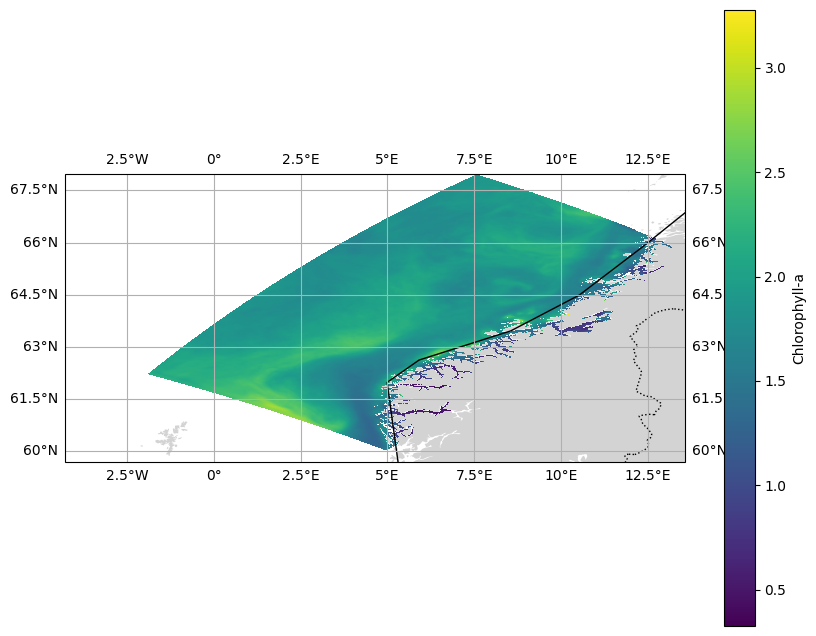

In [13]:
data = chlor_a_features_reprojected["chlor_a_features"].sel(stat="mean").values

x_grid = chlor_a_features_reprojected["x"].values
y_grid = chlor_a_features_reprojected["y"].values

x, y = np.meshgrid(x_grid, y_grid)

projection_emod = pyproj.CRS("EPSG:32632")  #UTM zone 32N
projection_lat_lon = pyproj.CRS("EPSG:4326")  #WGS84 (lat/lon)

transformer = pyproj.Transformer.from_crs(projection_emod, projection_lat_lon, always_xy=True)

lons, lats = transformer.transform(x, y)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


im = ax.pcolormesh(lons, lats, data, cmap='viridis', transform=ccrs.PlateCarree())

plt.colorbar(im, ax=ax, orientation='vertical', label='Chlorophyll-a')

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load your dataset (assuming chlor_a_features_reprojected is already loaded)
# chlor_a_features_reprojected = xr.open_dataset("path_to_your_file.nc")

# Extract the chlor_a_feature data (for a specific stat like 'mean')
data = chlor_a_features_reprojected["chlor_a_features"].sel(stat="mean").values

# Extract the x and y grid coordinates (these are grid indices, no transformation needed)
x_grid = chlor_a_features_reprojected["x"].values
y_grid = chlor_a_features_reprojected["y"].values

# Define the approximate bounds for mid-Norway (latitude, longitude)
lon_min = 6.0   # Minimum Longitude
lon_max = 13.0  # Maximum Longitude
lat_min = 62.0  # Minimum Latitude
lat_max = 66.0  # Maximum Latitude

# Set up the figure and axis with Cartopy (PlateCarree is for lat/lon projections)
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent to the mid-Norway region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add coastlines and gridlines for the map
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# Plot the chlorophyll data on the map using pcolormesh
# Mask the NaN values so that they don't interfere with the plot
im = ax.pcolormesh(x_grid, y_grid, data, cmap='viridis', transform=ccrs.PlateCarree(), zorder=10)

# Overlay a land mask or map in the background (fill in the NaN areas with map features)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)  # This fills the NaN areas with land

# Add colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Chlorophyll-a')

# Optional: Add more Cartopy features like rivers, lakes, etc.
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Show the plot
plt.show()
